,epoch,hit_all,hit_head,hit_tail,mrr_all,mrr_head,mrr_tail,training_time,method
0,0,24.241254,34.344508,17.514633,12.293698,18.204166,8.358581,47.735777,baseline
1,1,26.893969,36.498889,20.499132,13.105752,18.722662,9.366083,46.253043,baseline
2,2,27.955827,36.392619,22.338715,13.668244,18.807782,10.246403,44.699840,baseline
3,3,27.117924,34.808231,21.997813,13.243523,17.938896,10.117402,45.886634,baseline
4,4,26.376554,33.735871,21.476812,12.859057,17.310076,9.895624,47.374592,baseline


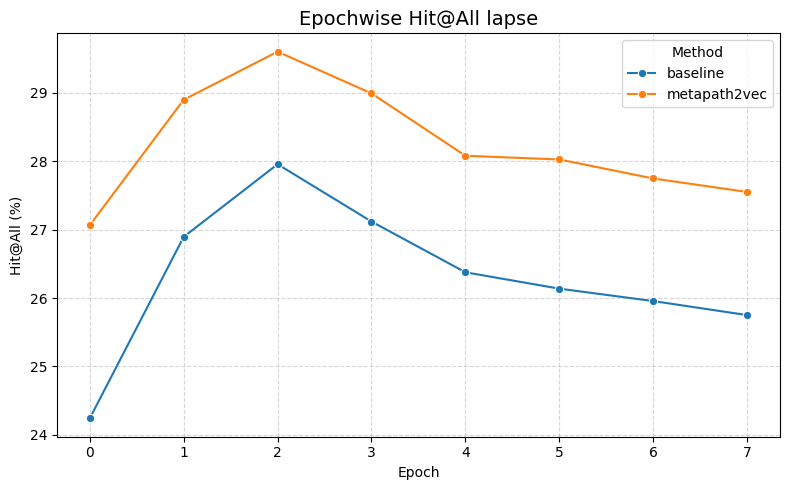

In [2]:
# =========================================
# Epoch별 hit_all 시각화 Notebook
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------------------------
# 데이터 로드
# -----------------------------------------
base_path = "./results/SR_GNN/main/Tmall"

methods = {
    "baseline": os.path.join(base_path, "baseline/target_ratio_0.98/sim_alpha_0.5/seed_0/results.csv"),
    "metapath2vec": os.path.join(base_path, "metapath2vec/target_ratio_0.98/sim_alpha_0.5/seed_0/results.csv"),
}

# 두 파일 읽고 하나의 DataFrame으로 결합
df_list = []
for method, path in methods.items():
    temp = pd.read_csv(path)
    temp["method"] = method
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)
display(df.head())

# -----------------------------------------
# 시각화
# -----------------------------------------
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df,
    x="epoch",
    y="hit_all",
    hue="method",
    marker="o"
)

plt.title("Epochwise Hit@All lapse", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Hit@All (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Method", loc="best")
plt.tight_layout()
plt.show()
